In [1]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [2]:
datos_covid = pd.read_csv("datos_covid.csv")

datos_covid.drop(columns=["sexo", "grupo_edad", "num_hosp", "num_uci", "num_def"], inplace=True)
datos_covid["fecha"] = pd.to_datetime(datos_covid["fecha"], format="%Y-%m-%d")
datos_covid.head()

,provincia_iso,fecha,num_casos
0,A,2020-01-01,0
1,A,2020-01-01,0
2,A,2020-01-01,0
3,A,2020-01-01,0
4,A,2020-01-01,0


In [4]:
# Agrupar y sumar los casos de infectados
datos_covid_provincias = datos_covid.groupby(["provincia_iso", "fecha"]).agg({"num_casos": "sum"})

# Restablecer el índice para obtener las columnas "provincia_iso" y "fecha" en su propia columna
datos_covid_provincias = datos_covid_provincias.reset_index()

In [5]:
provincias_iso = {
  "A": "Comunidad Valenciana",
  "AB": "Castilla-La Mancha",
  "AL": "Andalucía",
  "AV": "Castilla y León",
  "B": "Cataluña",
  "BA": "Extremadura",
  "BI": "País Vasco",
  "BU": "Castilla y León",
  "C": "Galicia",
  "CA": "Andalucía",
  "CC": "Extremadura",
  "CE": "Ceuta",
  "CO": "Andalucía",
  "CR": "Castilla-La Mancha",
  "CS": "Comunidad Valenciana",
  "CU": "Castilla-La Mancha",
  "GC": "Islas Canarias",
  "GI": "Cataluña",
  "GR": "Andalucía",
  "GU": "Castilla-La Mancha",
  "H": "Andalucía",
  "HU": "Aragón",
  "J": "Andalucía",
  "L": "Cataluña",
  "LE": "Castilla y León",
  "LO": "La Rioja",
  "LU": "Galicia",
  "M": "Comunidad de Madrid",
  "MA": "Andalucía",
  "ML": "Melilla",
  "MU": "Región de Murcia",
  "NC": "Comunidad Foral de Navarra",
  "O": "Principado de Asturias",
  "OR": "Galicia",
  "P": "Castilla y León",
  "PM": "Islas Baleares",
  "PO": "Galicia",
  "S": "Cantabria",
  "SA": "Castilla y León",
  "SE": "Andalucía",
  "SG": "Castilla y León",
  "SO": "Castilla y León",
  "SS": "País Vasco",
  "T": "Cataluña",
  "TE": "Aragón",
  "TF": "Islas Canarias",
  "TO": "Castilla-La Mancha",
  "V": "Comunidad Valenciana",
  "VA": "Castilla y León",
  "VI": "País Vasco",
  "Z": "Aragón",
  "ZA": "Castilla y León"
}

In [16]:
datos_covid_comunidades = datos_covid_provincias.replace({"provincia_iso": provincias_iso}).groupby(["provincia_iso", "fecha"]).agg({"num_casos": "sum"})
datos_covid_comunidades = datos_covid_comunidades.reset_index()
datos_covid_comunidades.head()

,provincia_iso,fecha,num_casos
0,Andalucía,2020-01-01,0
1,Andalucía,2020-01-02,0
2,Andalucía,2020-01-03,0
3,Andalucía,2020-01-04,0
4,Andalucía,2020-01-05,0


In [7]:
datos_covid_comunidades.groupby("provincia_iso").agg({"num_casos": "sum"}).head(20)

,num_casos
provincia_iso,
Andalucía,1399874
Aragón,406017
Cantabria,130272
Castilla y León,661488
Castilla-La Mancha,495528
Cataluña,2362753
Ceuta,19744
Comunidad Foral de Navarra,39955
Comunidad Valenciana,1356451


In [8]:
comunidades = [
    'Andalucía',
    'Aragón',
    'Principado de Asturias',
    'Islas Canarias',
    'Cantabria',
    'Castilla-La Mancha',
    'Castilla y León',
    'Cataluña',
    'Ceuta',
    'Comunidad Valenciana',
    'Extremadura',
    'Galicia',
    'Islas Baleares',
    'La Rioja',
    'Comunidad de Madrid',
    'Melilla',
    'Comunidad Foral de Navarra',
    'País Vasco',
    'Región de Murcia'
]

In [18]:
datos_covid_comunidades["num_casos"].interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)



In [20]:
plt = datos_covid_comunidades.unstack(level=0).plot(subplots=True, sharex=False, rot=0, figsize=(20, 40), layout=(10, 3))

TypeError: Empty 'DataFrame': no numeric data to plot

In [22]:
datos_covid_pais = datos_covid_comunidades.groupby("fecha").agg({"num_casos": "sum"})

datos_covid_pais = datos_covid_pais.reset_index()

datos_covid_pais = datos_covid_pais.groupby(datos_covid_pais.index//7).agg({"fecha" : "max", "num_casos" : "sum"})

datos_covid_pais

,fecha,num_casos
0,2020-01-07,0
1,2020-01-14,2
2,2020-01-21,2
3,2020-01-28,0
4,2020-02-04,1
5,2020-02-11,1
6,2020-02-18,3
7,2020-02-25,7
8,2020-03-03,262
9,2020-03-10,2860


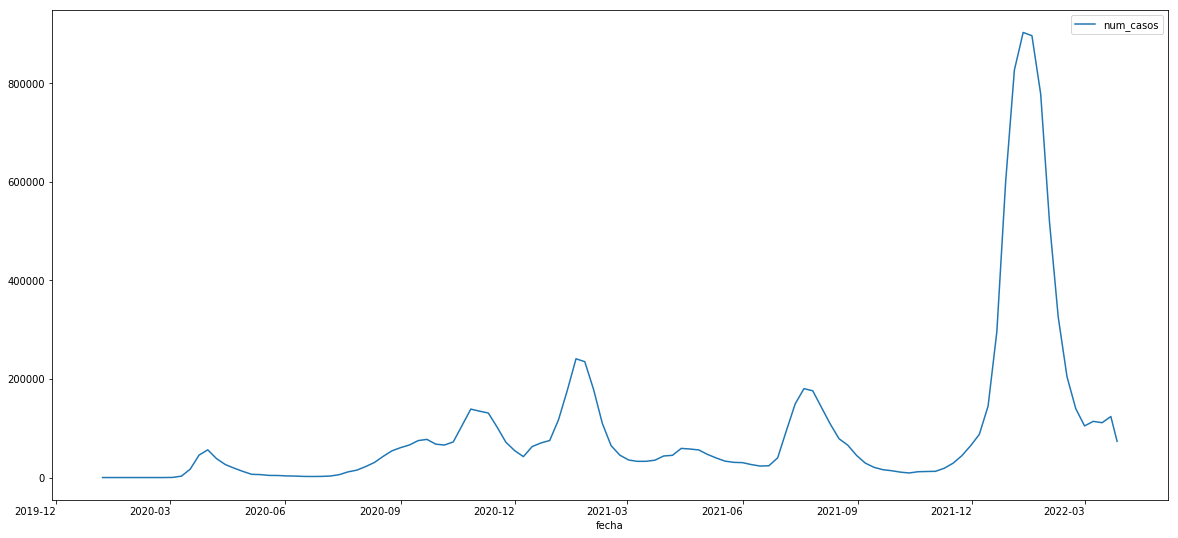

In [23]:
plt = datos_covid_pais.plot(x="fecha", y="num_casos", figsize=(20, 10), rot=0)

In [24]:
datos_covid_comunidades.to_csv("datos_covid_comunidades.csv")

## VISUALIZACION

In [25]:
cambios_nombres = {
  "Comunitat Valenciana": "Comunidad Valenciana",
  "Balears, Illes": "Islas Baleares",
  "Castilla - La Mancha": "Castilla-La Mancha",
  "Cataluña": "Cataluña",
  "Extremadura": "Extremadura",
  "País Vasco": "País Vasco",
  "Castilla y León": "Castilla y León",
  "Galicia": "Galicia",
  "Extremadura": "Extremadura",
  "Andalucía": "Andalucía",
  "Madrid, Comunidad de": "Comunidad de Madrid",
  "Murcia, Región de": "Región de Murcia",
  "Navarra, Comunidad Foral de": "Comunidad Foral de Navarra",
  "Rioja, La": "La Rioja",
  "Canarias": "Islas Canarias",
  "Aragón": "Aragón",
  "Asturias, Principado de": "Principado de Asturias"
}

In [26]:
datos_covid_comunidades = datos_covid_comunidades.reset_index()
datos_covid_comunidades.rename(columns={"provincia_iso": "comunidad"}, inplace=True)

In [27]:
datos_covid_comunidades["fecha_y"] = datos_covid_comunidades["fecha"].dt.year

In [29]:
poblaciones = pd.read_csv("poblaciones_comunidades.csv", sep=";", encoding="latin-1")
poblaciones.drop(columns=["Sexo", "Nacional"], inplace=True)
poblaciones["Comunidades y Ciudades Autónomas"] = poblaciones["Comunidades y Ciudades Autónomas"].str[3:]
poblaciones.rename(columns={"Comunidades y Ciudades Autónomas": "comunidad", "Periodo": "fecha_y", "Total":"poblacion"}, inplace=True)

poblaciones["poblacion"] = pd.to_numeric(poblaciones["poblacion"].str.replace(".", ""))
poblaciones["fecha_y"] = pd.to_numeric(poblaciones["fecha_y"])

poblaciones.head(40)

,comunidad,fecha_y,poblacion
0,Andalucía,2021,8472407
1,Andalucía,2020,8464411
2,Aragón,2021,1326261
3,Aragón,2020,1329391
4,"Asturias, Principado de",2021,1011792
5,"Asturias, Principado de",2020,1018784
6,"Balears, Illes",2021,1173008
7,"Balears, Illes",2020,1171543
8,Canarias,2021,2172944
9,Canarias,2020,2175952


In [30]:
datos_unidos = pd.merge(datos_covid_comunidades, poblaciones, on=["comunidad", "fecha_y"])
datos_unidos["casos_por_100000"] = datos_unidos["num_casos"] / datos_unidos["poblacion"] * 100000
datos_unidos["num_casos_acum"] = datos_unidos.groupby("comunidad")["num_casos"].cumsum()
datos_unidos["casos_por_100000_acum"] = datos_unidos.groupby("comunidad")["casos_por_100000"].cumsum().round(0)

datos_unidos.head(734)

,index,comunidad,fecha,num_casos,fecha_y,poblacion,casos_por_100000,num_casos_acum,casos_por_100000_acum
0,0,Andalucía,2020-01-01,0,2020,8464411,0.000000,0,0.0
1,1,Andalucía,2020-01-02,0,2020,8464411,0.000000,0,0.0
2,2,Andalucía,2020-01-03,0,2020,8464411,0.000000,0,0.0
3,3,Andalucía,2020-01-04,0,2020,8464411,0.000000,0,0.0
4,4,Andalucía,2020-01-05,0,2020,8464411,0.000000,0,0.0
5,5,Andalucía,2020-01-06,0,2020,8464411,0.000000,0,0.0
6,6,Andalucía,2020-01-07,0,2020,8464411,0.000000,0,0.0
7,7,Andalucía,2020-01-08,0,2020,8464411,0.000000,0,0.0
8,8,Andalucía,2020-01-09,0,2020,8464411,0.000000,0,0.0
9,9,Andalucía,2020-01-10,0,2020,8464411,0.000000,0,0.0


In [31]:
datos_unidos.drop(columns=["fecha_y", "poblacion"], inplace=True)

datos_unidos.head(10000)

,index,comunidad,fecha,num_casos,casos_por_100000,num_casos_acum,casos_por_100000_acum
0,0,Andalucía,2020-01-01,0,0.000000,0,0.0
1,1,Andalucía,2020-01-02,0,0.000000,0,0.0
2,2,Andalucía,2020-01-03,0,0.000000,0,0.0
3,3,Andalucía,2020-01-04,0,0.000000,0,0.0
4,4,Andalucía,2020-01-05,0,0.000000,0,0.0
5,5,Andalucía,2020-01-06,0,0.000000,0,0.0
6,6,Andalucía,2020-01-07,0,0.000000,0,0.0
7,7,Andalucía,2020-01-08,0,0.000000,0,0.0
8,8,Andalucía,2020-01-09,0,0.000000,0,0.0
9,9,Andalucía,2020-01-10,0,0.000000,0,0.0


In [38]:
comunidad = 'Cataluña'

datos_comunidad = datos_unidos.loc[datos_unidos['comunidad'] == comunidad]

window_size = 14  # Adjust the window size according to your preference


datos_comunidad['smoothed_data'] = datos_comunidad['num_casos'].rolling(window_size, center=True).mean()


datos_comunidad['smoothed_data'].fillna(method='bfill', inplace=True)
datos_comunidad['smoothed_data'].fillna(method='ffill', inplace=True)

datos_comunidad.head(10)

C:\Users\joanb\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\joanb\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,index,comunidad,fecha,num_casos,casos_por_100000,num_casos_acum,casos_por_100000_acum,smoothed_data
2,4085,Cataluña,2020-01-01,0,0.000000,0,0.0,0.071429
14,4086,Cataluña,2020-01-02,0,0.000000,0,0.0,0.071429
25,4087,Cataluña,2020-01-03,0,0.000000,0,0.0,0.071429
30,4088,Cataluña,2020-01-04,0,0.000000,0,0.0,0.071429
43,4089,Cataluña,2020-01-05,0,0.000000,0,0.0,0.071429
50,4090,Cataluña,2020-01-06,0,0.000000,0,0.0,0.071429
63,4091,Cataluña,2020-01-07,0,0.000000,0,0.0,0.071429
78,4092,Cataluña,2020-01-08,0,0.000000,0,0.0,0.071429
88,4093,Cataluña,2020-01-09,0,0.000000,0,0.0,0.071429
95,4094,Cataluña,2020-01-10,1,0.012853,1,0.0,0.071429


[3.00000000e+02 3.35119334e+02 3.73658383e+02 4.15771736e+02
 4.61572258e+02 5.11116324e+02 5.64387178e+02 6.21276795e+02
 6.81567034e+02 7.44911078e+02 8.10816652e+02 8.78632816e+02
 9.47542476e+02 1.01656282e+03 1.08455588e+03 1.15025103e+03
 1.21228023e+03 1.26922604e+03 1.31968061e+03 1.36231243e+03
 1.39593625e+03 1.41958029e+03 1.43254447e+03 1.43444394e+03
 1.42523333e+03 1.40520897e+03 1.37498919e+03 1.33547451e+03
 1.28779244e+03 1.23323210e+03 1.17317523e+03 1.10902900e+03
 1.04216588e+03 9.73873655e+02 9.05317747e+02 8.37516162e+02
 7.71326220e+02 7.07441717e+02 6.46398379e+02 5.88585227e+02
 5.34260153e+02 4.83567468e+02 4.36556254e+02 3.93198202e+02
 3.53404245e+02 3.17039483e+02 2.83936157e+02 2.53904625e+02
 2.26742396e+02 2.02241383e+02 1.80193565e+02 1.60395274e+02
 1.42650319e+02 1.26772167e+02 1.12585335e+02 9.99261873e+01
 8.86432544e+01 7.85971970e+01 6.96605116e+01 6.17170519e+01
 5.46614276e+01 4.83983299e+01 4.28418161e+01 3.79145856e+01
 3.35472630e+01 2.967770

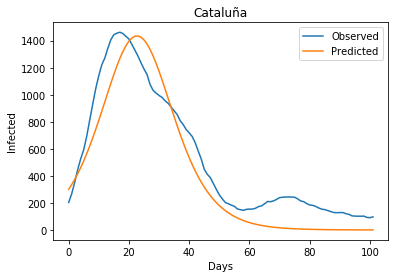

Estimated Parameters:
Infection Rate (beta): 6.550104301892091
Recovery Rate (gamma): 6.438288978839157


In [33]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize
import matplotlib.pyplot as plt

#PRIMERA OLA EN MADRID

# Definimos la ecuaciones del modelo SIR
def sir_model(y, t, beta, gamma):
    S, I, R = y
    N = S + I + R
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Condiciones iniciales
N = poblaciones.loc[(poblaciones['comunidad'] == comunidad) & (poblaciones['fecha_y'] == 2020), 'poblacion'].values[0]  # Población total Comunidad de Madrid 2020  # Población total Comunidad de Madrid 2020
I0 = 300  # Numero de infectados inicialmente
R0 = 0  # Numero de recuperados inicialmente
initial_conditions = [N - I0, I0, R0]  # Valores S, I, R iniciales
data = datos_comunidad["smoothed_data"].values
# Convertimos el tiempo a dias.
reference_date = pd.Timestamp(datos_comunidad['fecha'].min())  
time = (datos_comunidad['fecha'] - reference_date).dt.days.astype(float)
time = time.values

# Selecionamos los días donde empiezan a haber casos en Madrid de forma continua (5 de Febrero) 
# y terminamos en el final de la primera ola, el 21 de Junio(dia 171)

start_day = 70
end_day = 171
time_total = end_day - start_day

selected_data = data[(time >= start_day) & (time <= end_day)]
selected_time = np.arange(len(selected_data))


# Definimos la función objective (suma de errores cuadráticos)
def objective(params):
    beta, gamma = params
    y_pred = odeint(sir_model, initial_conditions, selected_time, args=(beta, gamma))
    return np.sum((y_pred[:, 1] - selected_data) ** 2)


# Optimización
result = minimize(objective, x0=[0.5, 0.1])
estimated_params = result.x
beta_est, gamma_est = estimated_params

# Simulamos el modelo SIR con los Datos iniciales
y_pred = odeint(sir_model, initial_conditions, selected_time, args=(beta_est, gamma_est))


y_pred_values = y_pred[:,1]

print(y_pred_values)

# Comparamos los datos reales con los predecidos
plt.plot(selected_time, selected_data, label='Observed')  
plt.plot(selected_time, y_pred_values, label='Predicted')  
plt.xlabel('Days')
plt.ylabel('Infected')
plt.legend()
plt.title(comunidad)
plt.show()


print("Estimated Parameters:")
print("Infection Rate (beta):", beta_est)
print("Recovery Rate (gamma):", gamma_est)

En la siguiente celda creamos la matriz de dataframes para cada comunidad, ordenados por fecha, para poder hacer los plots de todas las comunidades en orden.

In [34]:
datos_unidos.sort_values(by="fecha", ascending=True, inplace=True)
datos_unidos.reset_index(drop=True, inplace=True)

df_array = []
cont = 0
df = pd.DataFrame(data=None, columns=datos_unidos.columns)
for row in datos_unidos.iterrows():
    df.loc[cont] = row[1]
    cont+=1
    if cont == 19:
        cont = 0
        df_array.append(df)
        df = pd.DataFrame(data=None, columns=datos_unidos.columns)

C:\Users\joanb\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\joanb\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


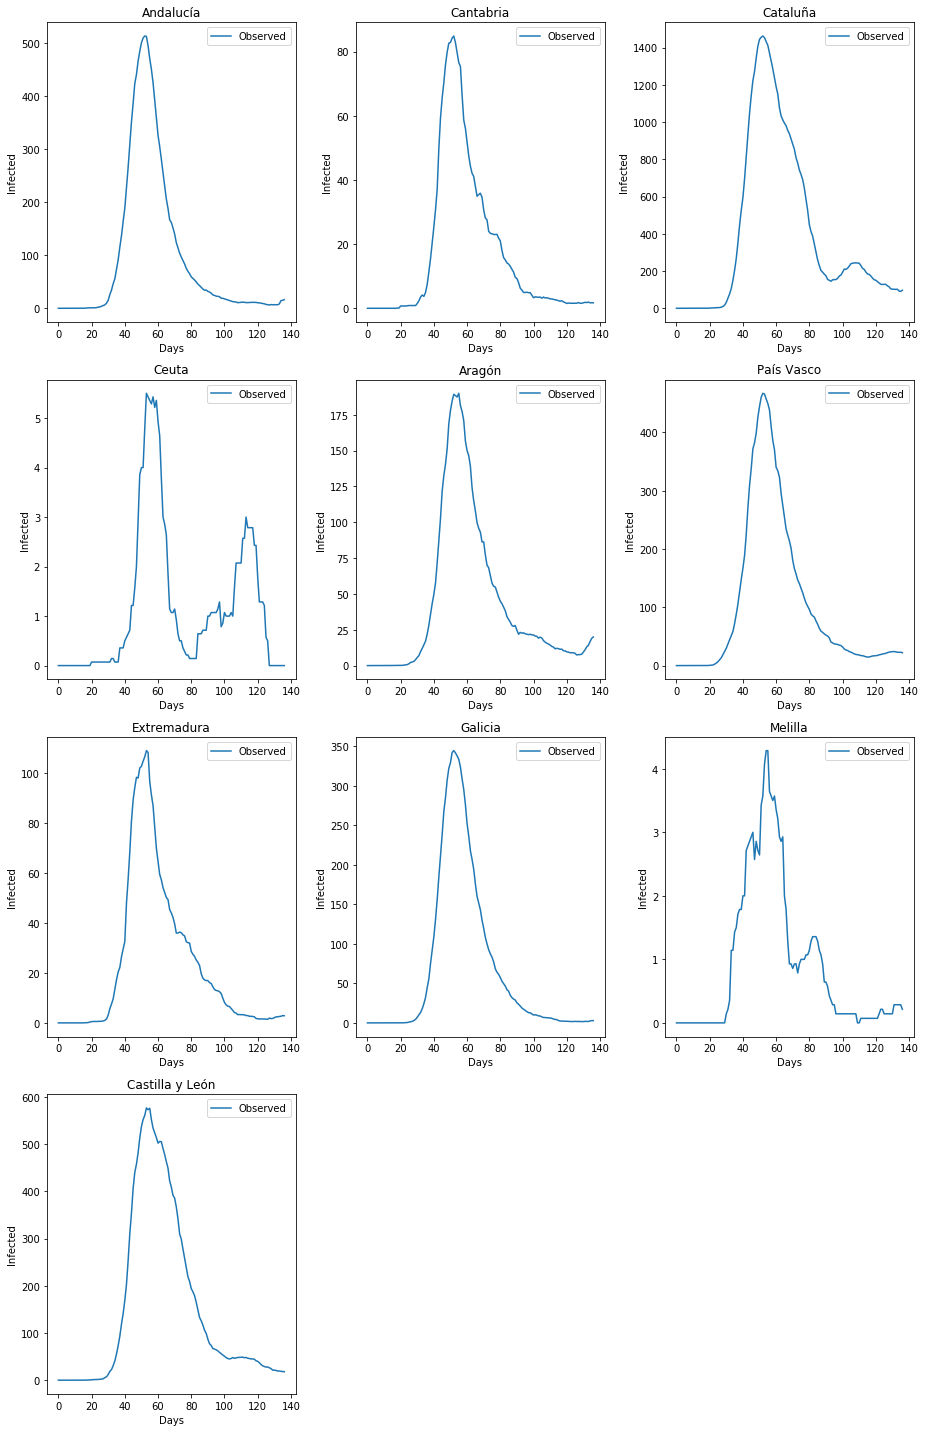

In [36]:
import matplotlib.pyplot as plt

# Obtener la lista de comunidades
comunidades = datos_unidos['comunidad'].unique()

# Calcular el número de filas y columnas para organizar los gráficos
num_comunidades = len(comunidades)
num_filas = (num_comunidades + 4) // 3
num_columnas = min(3, num_comunidades)

# Configurar el tamaño del gráfico general
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(13, 20))

# Iterar sobre cada comunidad y generar el gráfico correspondiente
for i, comunidad in enumerate(comunidades):
    datos_comunidad = datos_unidos.loc[datos_unidos['comunidad'] == comunidad]

    window_size = 14  # Ajustar el tamaño de la ventana según su preferencia
    datos_comunidad['smoothed_data'] = datos_comunidad['num_casos'].rolling(window_size, center=True).mean()
    datos_comunidad['smoothed_data'].fillna(method='bfill', inplace=True)
    datos_comunidad['smoothed_data'].fillna(method='ffill', inplace=True)

    data = datos_comunidad["smoothed_data"].values
    reference_date = pd.Timestamp(datos_comunidad['fecha'].min())
    time = (datos_comunidad['fecha'] - reference_date).dt.days.astype(float)
    time = time.values

    start_day = 35
    end_day = 171
    time_total = end_day - start_day

    selected_data = data[(time >= start_day) & (time <= end_day)]
    selected_time = np.arange(len(selected_data))

    # Calcular la ubicación del gráfico en el diseño de filas y columnas
    fila = i // num_columnas
    columna = i % num_columnas

    # Crear un nuevo gráfico en la ubicación correspondiente
    ax = axs[fila, columna]
    ax.plot(selected_time, selected_data, label='Observed')
    ax.set_xlabel('Days')
    ax.set_ylabel('Infected')
    ax.legend()
    ax.set_title(comunidad)

# Ajustar el espaciado entre los gráficos y eliminar los ejes vacíos si es necesario
if num_comunidades < num_filas * num_columnas:
    for i in range(num_comunidades, num_filas * num_columnas):
        axs.flatten()[i].axis('off')

# Ajustar el espaciado entre los gráficos
plt.tight_layout()

# Mostrar los gráficos de las comunidades
plt.show()


C:\Users\joanb\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\joanb\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\joanb\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C

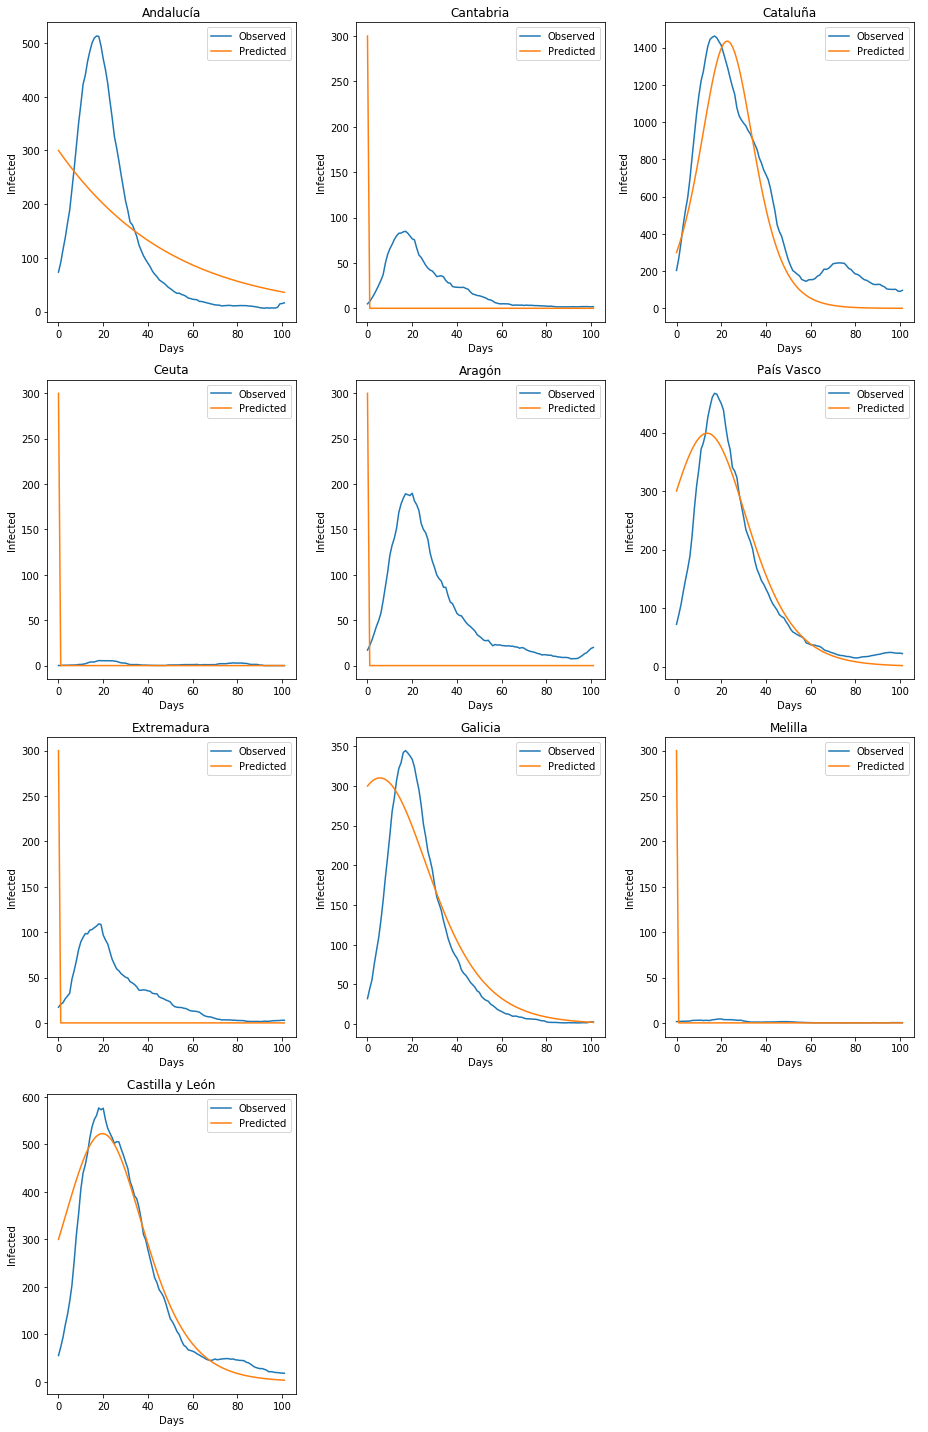

In [52]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Obtener la lista de comunidades
comunidades = datos_unidos['comunidad'].unique()

# Calcular el número de filas y columnas para organizar los gráficos
num_comunidades = len(comunidades)
num_filas = (num_comunidades + 2) // 3
num_columnas = min(3, num_comunidades)

# Configurar el tamaño del gráfico general
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(13, 20))

# Iterar sobre cada comunidad y generar el gráfico correspondiente
for i, comunidad in enumerate(comunidades):
    datos_comunidad = datos_unidos.loc[datos_unidos['comunidad'] == comunidad]
    datos_comunidad['smoothed_data'] = datos_comunidad['num_casos'].rolling(window_size, center=True).mean()
    datos_comunidad['smoothed_data'].fillna(method='bfill', inplace=True)
    datos_comunidad['smoothed_data'].fillna(method='ffill', inplace=True)

    # Definimos la ecuaciones del modelo SIR
    def sir_model(y, t, beta, gamma):
        S, I, R = y
        N = S + I + R
        dSdt = -beta * S * I / N
        dIdt = beta * S * I / N - gamma * I
        dRdt = gamma * I
        return [dSdt, dIdt, dRdt]

    # Condiciones iniciales
    N = poblaciones.loc[(poblaciones['comunidad'] == comunidad) & (poblaciones['fecha_y'] == 2020), 'poblacion'].values[0]
    I0 = 300
    R0 = 0
    initial_conditions = [N - I0, I0, R0]
    data = datos_comunidad["smoothed_data"].values
    reference_date = pd.Timestamp(datos_comunidad['fecha'].min())
    time = (datos_comunidad['fecha'] - reference_date).dt.days.astype(float)
    time = time.values

    start_day = 70
    end_day = 171
    time_total = end_day - start_day

    selected_data = data[(time >= start_day) & (time <= end_day)]
    selected_time = np.arange(len(selected_data))

    def objective(params):
        beta, gamma = params
        y_pred = odeint(sir_model, initial_conditions, selected_time, args=(beta, gamma))
        return np.sum((y_pred[:, 1] - selected_data) ** 2)

    result = minimize(objective, x0=[0.5, 0.1])
    estimated_params = result.x
    beta_est, gamma_est = estimated_params

    y_pred = odeint(sir_model, initial_conditions, selected_time, args=(beta_est, gamma_est))

    y_pred_values = y_pred[:, 1]

    # Calcular la ubicación del gráfico en el diseño de filas y columnas
    fila = i // num_columnas
    columna = i % num_columnas

    # Crear un nuevo gráfico en la ubicación correspondiente
    ax = axs[fila, columna]

    # Comparamos los datos reales con los predecidos
    ax.plot(selected_time, selected_data, label='Observed')
    ax.plot(selected_time, y_pred_values, label='Predicted')
    ax.set_xlabel('Days')
    ax.set_ylabel('Infected')
    ax.legend()
    ax.set_title(comunidad)

    
# Ajustar el espaciado entre los gráficos y eliminar los ejes vacíos si es necesario
if num_comunidades < num_filas * num_columnas:
    for i in range(num_comunidades, num_filas * num_columnas):
        axs.flatten()[i].axis('off')

# Ajustar el espaciado entre los gráficos
plt.tight_layout()

# Mostrar los gráficos de las comunidades
plt.show()
